In [1]:
using ReinforcementLearningCore
using RLIntro

In [2]:
using RLIntro
using RLIntro.BlackJack

In [3]:
env = BlackJackEnv()

ns, na = length(get_observation_space(env)), length(get_action_space(env))

(220, 2)

In [4]:
stick_action = findall(x -> x == :stick, BlackJack.ACTIONS)[]

table = fill(1, size(BlackJack.INDS)...)
table[:, 10:11, :] .= stick_action
table = reshape(table, :);

In [8]:
agent = Agent(
    policy = VBasedPolicy(
        value_learner=MonteCarloLearner(approximator=TabularApproximator(n_state=ns)),
        mapping= (obs, V) -> begin
            action_values = zeros(na)
            action_values[table[get_state(obs)]] = 1.0
            action_values
            end),
    trajectory=EpisodicCompactSARTSATrajectory()
);

In [14]:
run(agent, env, StopAfterEpisode(10000))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


EmptyHook()

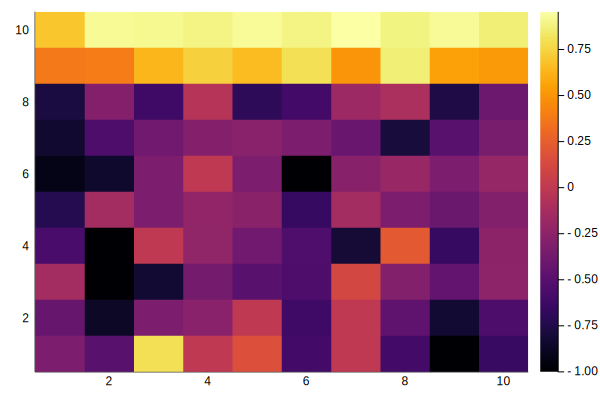

In [19]:
using Plots
V = reshape(agent.policy.value_learner.approximator.table, size(BlackJack.INDS)...)
V_with_usable_ace = V[1, 2:11, :]
V_without_usable_ace = V[2, 2:11, :]

heatmap(V_with_usable_ace)

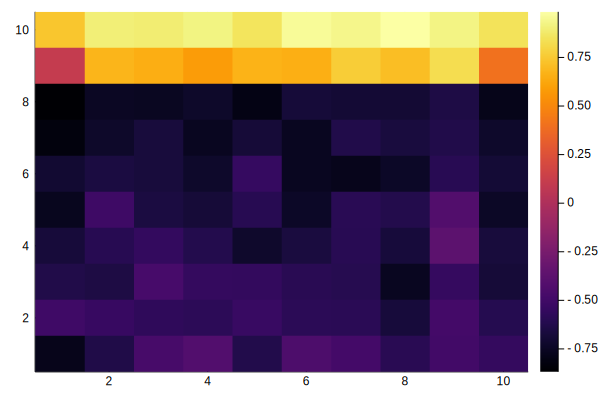

In [20]:
heatmap(V_without_usable_ace)

In [23]:
agent = Agent(
    policy=VBasedPolicy(
        value_learner=MonteCarloLearner(approximator=TabularApproximator(n_state=ns)),
        mapping= (obs, V) -> begin
            action_values = zeros(na)
            action_values[table[get_state(obs)]] = 1.0
            action_values
            end),
    trajectory=EpisodicCompactSARTSATrajectory()
);
run(agent, env, StopAfterEpisode(500000))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03


EmptyHook()

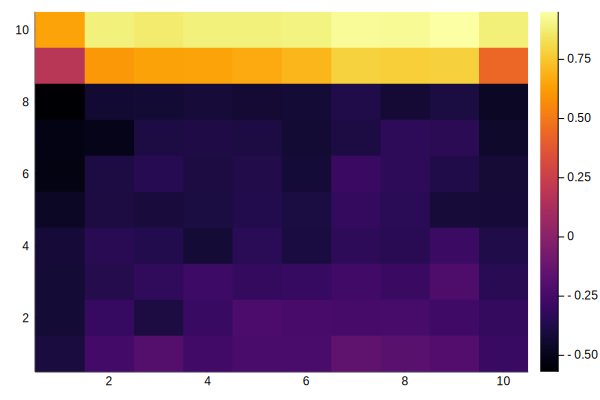

In [25]:
V = reshape(agent.policy.value_learner.approximator.table, size(BlackJack.INDS)...)
V_with_usable_ace = V[1, 2:11, :]
V_without_usable_ace = V[2, 2:11, :]

heatmap(V_with_usable_ace)

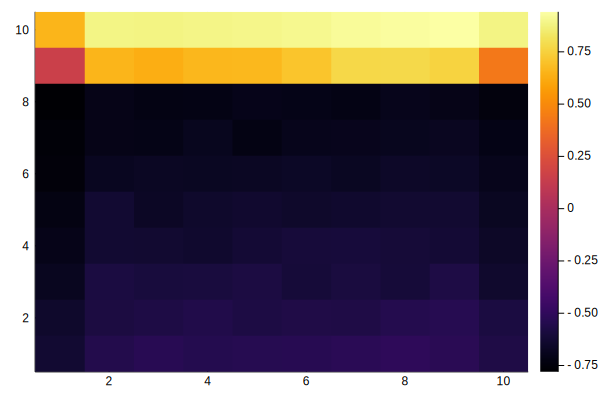

In [26]:
heatmap(V_without_usable_ace)